In [1]:
# Importing necessary libraries

# Data preprocessing
import pandas as pd
import numpy as np
import os 
import librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from visualkeras import layered_view
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Suppressing warnings
from warnings import filterwarnings
filterwarnings('ignore')

Class : Blues



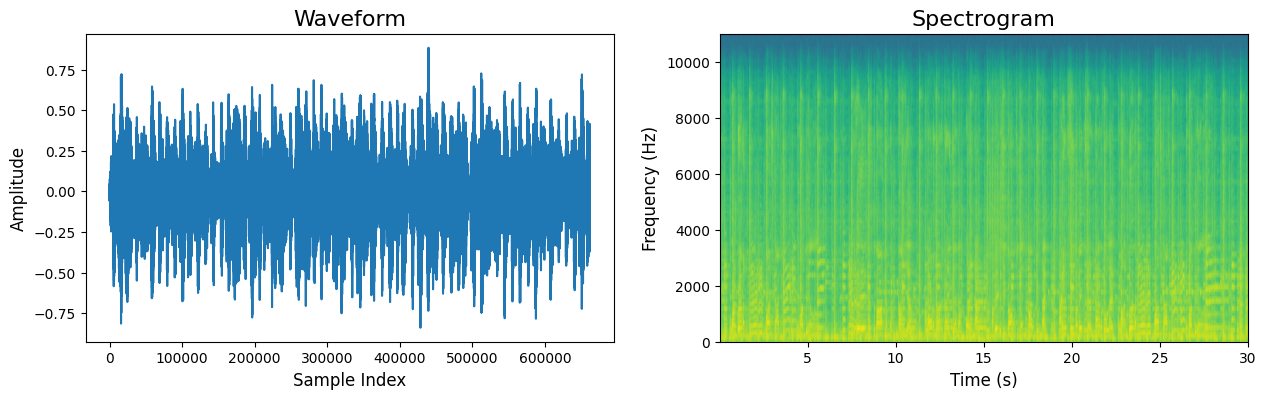

In [55]:
# Displaying a random waveform and spectrogram
audioFile = 'Dataset/blues/blues.00000.wav'

# Loading audio file
sample, sampleRate = librosa.load(audioFile)

# Displaying audio
print('Class : Blues\n')
ipd.display(ipd.Audio(sample, rate = sampleRate))

# Displaying waveform
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.plot(sample)
plt.title('Waveform', fontsize = 16)
plt.xlabel('Sample Index', fontsize = 12)
plt.ylabel('Amplitude', fontsize = 12)

# Displaying spectrogram
plt.subplot(1, 2, 2)
plt.specgram(sample, Fs = sampleRate)
plt.title('Spectrogram', fontsize = 16)
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Frequency (Hz)', fontsize = 12)

plt.show()

In [30]:
#Load Dataset
import glob
audio_files = glob.glob('Dataset/*/*.wav')

In [31]:
# Normalisasi amplitudo
def normalize_audio(audio_files):
    return audio_files / np.max(np.abs(audio_files))

In [ ]:
import soundfile as sf

# Definisikan fungsi augmentasi
def noise(audio_files):
    noise_amp = 0.035 * np.random.uniform() * np.amax(audio_files)
    audio_files = audio_files + noise_amp * np.random.normal(size=audio_files.shape[0])
    return audio_files

def stretch(audio_files, rate=0.8):
    return librosa.effects.time_stretch(audio_files, rate=rate)

def shift(audio_files):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(audio_files, shift_range)

def pitch(audio_files, sampleRate, n_steps=4):
    return librosa.effects.pitch_shift(audio_files, sr=sampleRate, n_steps=n_steps)

# Misalkan dataset Anda disimpan dalam folder 'audio_dataset'
dataset_path = 'Dataset'
output_path = 'augmented_audio_dataset'

# Buat folder output jika belum ada
os.makedirs(output_path, exist_ok=True)

# Loop melalui semua file dalam dataset dan subfoldernya
for root, dirs, files in os.walk(dataset_path):
    for filename in files:
        if filename.endswith('.wav'):  # Sesuaikan dengan ekstensi file Anda
            file_path = os.path.join(root, filename)
            data, sampleRate = librosa.load(file_path)
            
            # Terapkan augmentasi
            data_noisy = noise(data)
            data_stretched = stretch(data)
            data_shifted = shift(data)
            data_pitched = pitch(data, sampleRate)
            
            # Buat subfolder yang sesuai di folder output
            relative_path = os.path.relpath(root, dataset_path)
            output_subfolder = os.path.join(output_path, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)
            
            # Simpan hasil augmentasi
            sf.write(os.path.join(output_subfolder, 'noisy_' + filename), data_noisy, sampleRate)
            sf.write(os.path.join(output_subfolder, 'stretched_' + filename), data_stretched, sampleRate)
            sf.write(os.path.join(output_subfolder, 'shifted_' + filename), data_shifted, sampleRate)
            sf.write(os.path.join(output_subfolder, 'pitched_' + filename), data_pitched, sampleRate)

print("Proses augmentasi selesai dan file telah disimpan.")

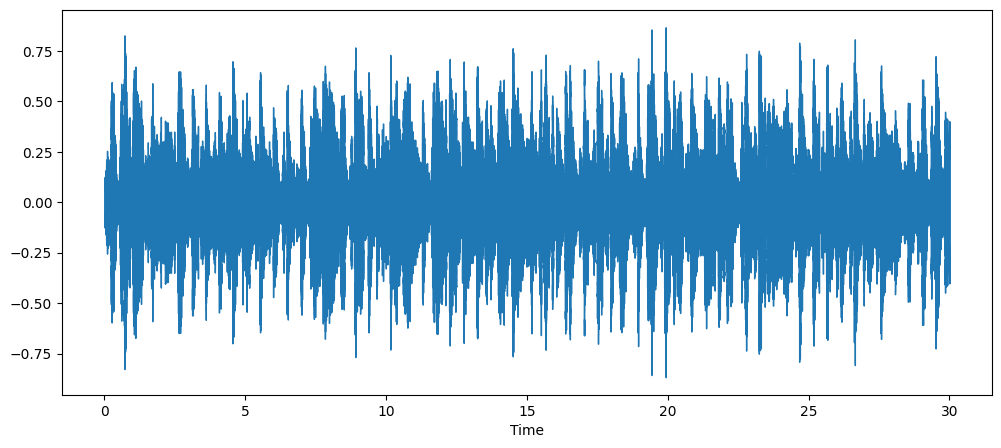

In [56]:
#Tampilan Data yang Ditambahkan Noise
noise_data = noise(sample)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=noise_data, sr=sampleRate)
ipd.Audio(noise_data, rate=sampleRate)

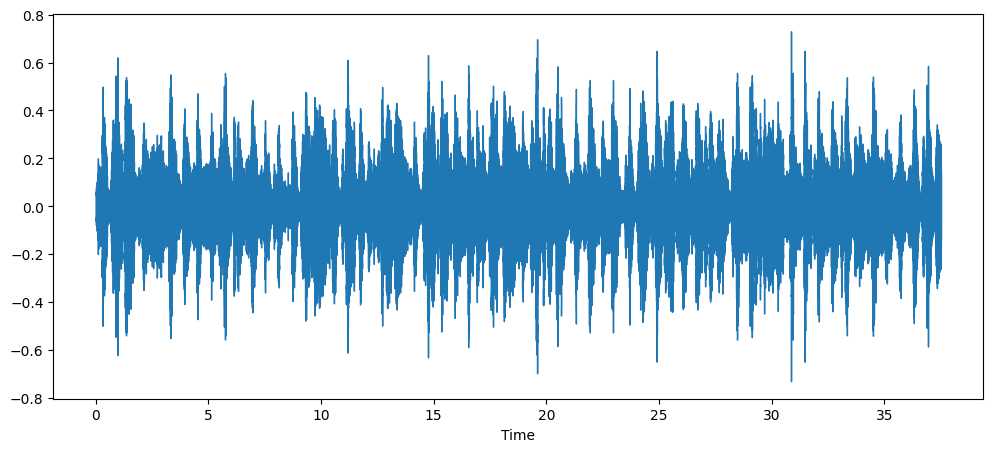

In [15]:
# STRETCHED AUDIO
stretch_data = stretch(sample)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=stretch_data, sr=sampleRate)
ipd.Audio(stretch_data, rate=sampleRate)

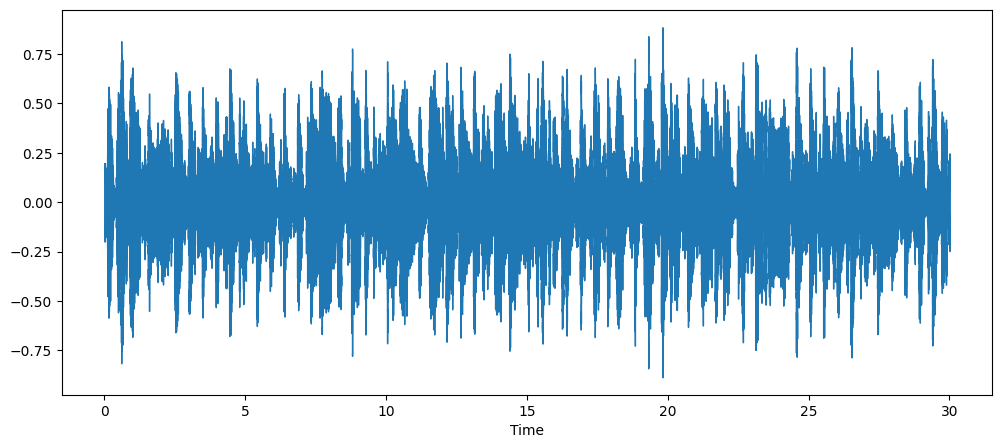

In [26]:
# SHIFTED AUDIO
shifted_audio = shift(sample)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=shifted_audio, sr=sampleRate)
ipd.Audio(shifted_audio, rate=sampleRate)

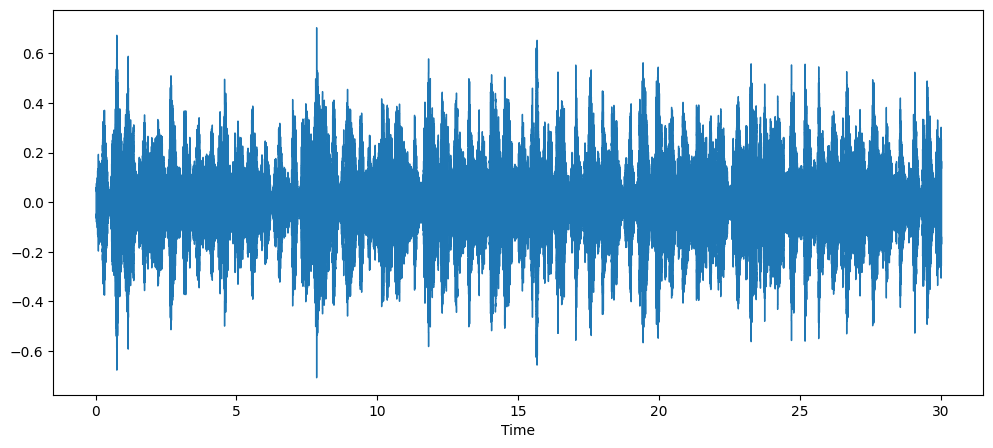

In [57]:
# AUDIO WITH PITCH
pitch_audio = pitch(sample, sampleRate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=pitch_audio, sr=sampleRate)
ipd.Audio(pitch_audio, rate=sampleRate)

In [59]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    #Mel-Frequency Cepstral Coefficients
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean

In [77]:
import glob
# Fungsi untuk menghasilkan fitur dari semua genre
# Fungsi untuk menghasilkan fitur dari semua genre dan menyertakan nama file
# Fungsi untuk menghasilkan fitur dari semua genre dan menyertakan nama file
def generate_features_and_labels():
    all_features = []

    Dataset = ['blues', 'classical', 'pop', 'reggae', 'rock']
    for genre in Dataset:
        files_audio = glob.glob('Dataset/' + genre + '/*.wav')
        print('Processing %d songs in %s genre...' % (len(files_audio), genre))
        for f in files_audio:
            try:
                features = extract_features(f)
                all_features.append([f] + features.tolist())
            except Exception as e:
                print(f"Error processing {f}: {str(e)}")

    return all_features

# Panggil fungsi untuk menghasilkan fitur
features_with_filenames = generate_features_and_labels()

# Buat DataFrame dari fitur-fitur tersebut
column_names = ['filename'] + [f'mfcc_{i}' for i in range(1, 14)]
df = pd.DataFrame(features_with_filenames, columns=column_names)

# Contoh untuk melihat hasilnya
print(df.head())

Processing 500 songs in blues genre...
Processing 500 songs in classical genre...
Processing 500 songs in pop genre...
Processing 500 songs in reggae genre...
Processing 500 songs in rock genre...
                        filename      mfcc_1      mfcc_2     mfcc_3  \
0  Dataset/blues\blues.00000.wav -113.598824  121.570671 -19.162262   
1  Dataset/blues\blues.00001.wav -207.523834  123.985138   8.947019   
2  Dataset/blues\blues.00002.wav  -90.757164  140.440872 -29.084547   
3  Dataset/blues\blues.00003.wav -199.575134  150.086105   5.663404   
4  Dataset/blues\blues.00004.wav -160.354172  126.209480 -35.581394   

      mfcc_4     mfcc_5     mfcc_6     mfcc_7     mfcc_8     mfcc_9  \
0  42.363941  -6.362266  18.621931 -13.699734  15.339803 -12.274304   
1  35.867149   2.909595  21.519472  -8.556513  23.370676 -10.103608   
2  31.686693 -13.976547  25.753752 -13.664990  11.634442 -11.778322   
3  26.855278   1.770071  14.232647  -4.827845   9.286853  -0.756120   
4  22.139256 -32.4735

In [78]:
df

filename      mfcc_1      mfcc_2  \
0             Dataset/blues\blues.00000.wav -113.598824  121.570671   
1             Dataset/blues\blues.00001.wav -207.523834  123.985138   
2             Dataset/blues\blues.00002.wav  -90.757164  140.440872   
3             Dataset/blues\blues.00003.wav -199.575134  150.086105   
4             Dataset/blues\blues.00004.wav -160.354172  126.209480   
...                                     ...         ...         ...   
2495  Dataset/rock\stretched_rock.00095.wav -191.531174  105.817307   
2496  Dataset/rock\stretched_rock.00096.wav -180.932175  112.458595   
2497  Dataset/rock\stretched_rock.00097.wav -163.805573  111.880936   
2498  Dataset/rock\stretched_rock.00098.wav -262.131256  120.447876   
2499  Dataset/rock\stretched_rock.00099.wav -274.162354  119.553253   

         mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7     mfcc_8  \
0    -19.162262  42.363941  -6.362266  18.621931 -13.699734  15.339803   
1      8.947019  35.867149   2.909595  21.519472  -8.556513  23.370676   
2    -29.084547  31.686693 -13.976547  25.753752 -13.664990  11.634442   
3      5.663404  26.855278   1.770071  14.232647  -4.827845   9.286853   
4    -35.581394  22.139256 -32.473549  10.850702 -23.350071   0.493249   
...         ...        ...        ...        ...        ...        ...   
2495 -22.822981  57.414516  -7.260570  18.623447 -16.607708  17.266804   
2496 -31.386482  47.153206  -8.121152  21.650372 -17.824024  19.192440   
2497 -46.893070  52.400860 -12.757316  21.521894 -11.773211  19.758814   
2498  -8.946117  55.585052  10.774797  20.265375 -10.303602  15.030937   
2499 -22.288507  51.694065  -0.994061  23.286476  -6.124467  14.943345   

         mfcc_9    mfcc_10    mfcc_11    mfcc_12    mfcc_13  
0    -12.274304  10.970945  -8.326061   8.802088  -3.669941  
1    -10.103608  11.899242  -5.558824   5.377876  -2.234492  
2    -11.778322   9.714756 -13.125314   5.791247  -8.901968  
3     -0.756120   8.134435  -3.200026   6.078081  -2.478445  
4    -11.796538   1.203519 -13.084959  -2.810499  -6.934471  
...         ...        ...        ...        ...        ...  
2495 -21.837833  14.810670 -11.515009  12.289334 -11.318830  
2496 -21.186035  10.285021 -12.306079  13.108449 -16.017260  
2497 -17.907127   9.666159 -15.498229  10.360951 -17.324409  
2498  -7.721060  12.212317  -8.820339   7.686599  -9.443735  
2499 -11.620583  16.290777  -2.317289   9.529902 -14.449243  

[2500 rows x 14 columns]

In [79]:
len(features_with_filenames[0])

14

In [80]:
print(df)

                                   filename      mfcc_1      mfcc_2  \
0             Dataset/blues\blues.00000.wav -113.598824  121.570671   
1             Dataset/blues\blues.00001.wav -207.523834  123.985138   
2             Dataset/blues\blues.00002.wav  -90.757164  140.440872   
3             Dataset/blues\blues.00003.wav -199.575134  150.086105   
4             Dataset/blues\blues.00004.wav -160.354172  126.209480   
...                                     ...         ...         ...   
2495  Dataset/rock\stretched_rock.00095.wav -191.531174  105.817307   
2496  Dataset/rock\stretched_rock.00096.wav -180.932175  112.458595   
2497  Dataset/rock\stretched_rock.00097.wav -163.805573  111.880936   
2498  Dataset/rock\stretched_rock.00098.wav -262.131256  120.447876   
2499  Dataset/rock\stretched_rock.00099.wav -274.162354  119.553253   

         mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7     mfcc_8  \
0    -19.162262  42.363941  -6.362266  18.621931 -13.699734  15.339803   

In [81]:
# Fungsi untuk mendeteksi genre berdasarkan nama file
def detect_genre(filename):
    if 'blues' in filename:
        return 'blues'
    elif 'classical' in filename:
        return 'classical'
    elif 'pop' in filename:
        return 'pop'
    elif 'reggae' in filename:
        return 'reggae'
    elif 'rock' in filename:
        return 'rock'
    else:
        return 'unknown'

# Tambahkan kolom label berdasarkan deteksi genre
df['label'] = df['filename'].apply(detect_genre)

# Contoh untuk melihat hasilnya
print(df.head())

                        filename      mfcc_1      mfcc_2     mfcc_3  \
0  Dataset/blues\blues.00000.wav -113.598824  121.570671 -19.162262   
1  Dataset/blues\blues.00001.wav -207.523834  123.985138   8.947019   
2  Dataset/blues\blues.00002.wav  -90.757164  140.440872 -29.084547   
3  Dataset/blues\blues.00003.wav -199.575134  150.086105   5.663404   
4  Dataset/blues\blues.00004.wav -160.354172  126.209480 -35.581394   

      mfcc_4     mfcc_5     mfcc_6     mfcc_7     mfcc_8     mfcc_9  \
0  42.363941  -6.362266  18.621931 -13.699734  15.339803 -12.274304   
1  35.867149   2.909595  21.519472  -8.556513  23.370676 -10.103608   
2  31.686693 -13.976547  25.753752 -13.664990  11.634442 -11.778322   
3  26.855278   1.770071  14.232647  -4.827845   9.286853  -0.756120   
4  22.139256 -32.473549  10.850702 -23.350071   0.493249 -11.796538   

     mfcc_10    mfcc_11   mfcc_12   mfcc_13  label  
0  10.970945  -8.326061  8.802088 -3.669941  blues  
1  11.899242  -5.558824  5.377876 -2.234

In [82]:
df

filename      mfcc_1      mfcc_2  \
0             Dataset/blues\blues.00000.wav -113.598824  121.570671   
1             Dataset/blues\blues.00001.wav -207.523834  123.985138   
2             Dataset/blues\blues.00002.wav  -90.757164  140.440872   
3             Dataset/blues\blues.00003.wav -199.575134  150.086105   
4             Dataset/blues\blues.00004.wav -160.354172  126.209480   
...                                     ...         ...         ...   
2495  Dataset/rock\stretched_rock.00095.wav -191.531174  105.817307   
2496  Dataset/rock\stretched_rock.00096.wav -180.932175  112.458595   
2497  Dataset/rock\stretched_rock.00097.wav -163.805573  111.880936   
2498  Dataset/rock\stretched_rock.00098.wav -262.131256  120.447876   
2499  Dataset/rock\stretched_rock.00099.wav -274.162354  119.553253   

         mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7     mfcc_8  \
0    -19.162262  42.363941  -6.362266  18.621931 -13.699734  15.339803   
1      8.947019  35.867149   2.909595  21.519472  -8.556513  23.370676   
2    -29.084547  31.686693 -13.976547  25.753752 -13.664990  11.634442   
3      5.663404  26.855278   1.770071  14.232647  -4.827845   9.286853   
4    -35.581394  22.139256 -32.473549  10.850702 -23.350071   0.493249   
...         ...        ...        ...        ...        ...        ...   
2495 -22.822981  57.414516  -7.260570  18.623447 -16.607708  17.266804   
2496 -31.386482  47.153206  -8.121152  21.650372 -17.824024  19.192440   
2497 -46.893070  52.400860 -12.757316  21.521894 -11.773211  19.758814   
2498  -8.946117  55.585052  10.774797  20.265375 -10.303602  15.030937   
2499 -22.288507  51.694065  -0.994061  23.286476  -6.124467  14.943345   

         mfcc_9    mfcc_10    mfcc_11    mfcc_12    mfcc_13  label  
0    -12.274304  10.970945  -8.326061   8.802088  -3.669941  blues  
1    -10.103608  11.899242  -5.558824   5.377876  -2.234492  blues  
2    -11.778322   9.714756 -13.125314   5.791247  -8.901968  blues  
3     -0.756120   8.134435  -3.200026   6.078081  -2.478445  blues  
4    -11.796538   1.203519 -13.084959  -2.810499  -6.934471  blues  
...         ...        ...        ...        ...        ...    ...  
2495 -21.837833  14.810670 -11.515009  12.289334 -11.318830   rock  
2496 -21.186035  10.285021 -12.306079  13.108449 -16.017260   rock  
2497 -17.907127   9.666159 -15.498229  10.360951 -17.324409   rock  
2498  -7.721060  12.212317  -8.820339   7.686599  -9.443735   rock  
2499 -11.620583  16.290777  -2.317289   9.529902 -14.449243   rock  

[2500 rows x 15 columns]

In [83]:
df.to_csv('Ekstraksi_MFCC.csv', index=False)

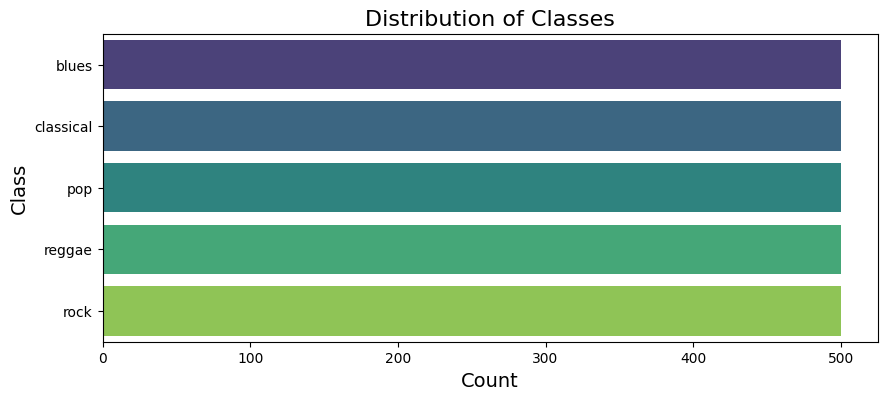

In [87]:
# Plotting count distribution of classes
plt.figure(figsize=(10, 4))
sns.countplot(y=df['label'], palette='viridis')
plt.title('Distribution of Classes', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Class', fontsize=14)
plt.show()
